In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium

In [4]:
# Load the data
crime_data = pd.read_csv('NCRB_Table_1C.2 (1).csv')

# Remove the last two rows which contain total values
crime_data = crime_data.iloc[:-2]

# Convert the 'State/UT' column to string
crime_data['State/UT'] = crime_data['State/UT'].astype(str)

# Question 1: Crime Rate by State/Region
### Which state or union territory has the highest or lowest rates of violent crimes?

In [7]:
violent_crime_rates = pd.to_numeric(crime_data['Total Violent Crimes (Cols.3 to 17)'], errors='coerce')
violent_crime_rates = violent_crime_rates.fillna(0).astype(int)
max_violent_crime_rate = violent_crime_rates.max()
min_violent_crime_rate = violent_crime_rates.min()

max_violent_crime_state = crime_data.loc[violent_crime_rates.idxmax()]['State/UT']
min_violent_crime_state = crime_data.loc[violent_crime_rates.idxmin()]['State/UT']

print(f'The state with the highest violent crime rate is {max_violent_crime_state} with {max_violent_crime_rate} crimes.')
print(f'The state with the lowest violent crime rate is {min_violent_crime_state} with {int(min_violent_crime_rate)} crimes.')

The state with the highest violent crime rate is Total State (S) with 419090 crimes.
The state with the lowest violent crime rate is nan with 0 crimes.


# Question 2: Violent Crime Trend Analysis
### What are the most common violent crimes in India, and how do they differ across regions?

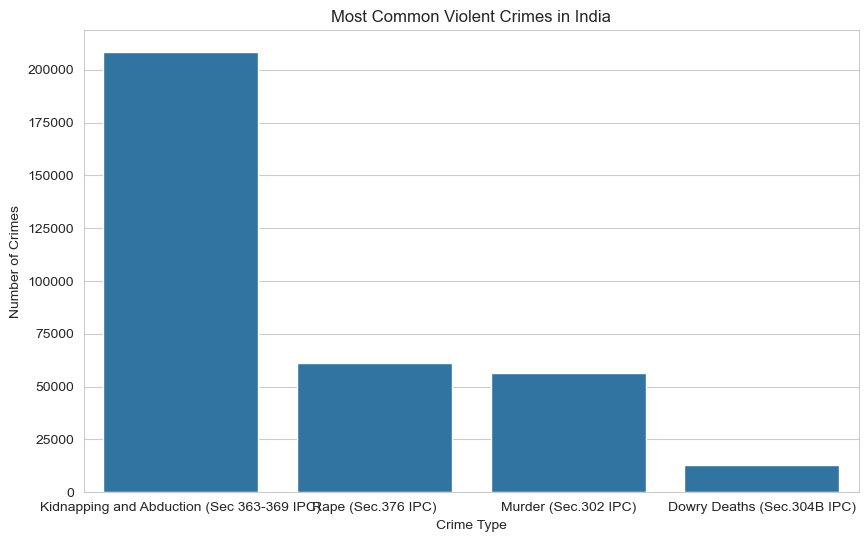

In [8]:
crime_types = ['Murder (Sec.302 IPC)', 'Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Kidnapping and Abduction (Sec 363-369 IPC)']
crime_rates = crime_data[crime_types].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=crime_rates.index, y=crime_rates.values)
plt.title('Most Common Violent Crimes in India')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

# Question 3: Correlation Analysis of Crimes
### Are there any correlations between different types of violent crimes?

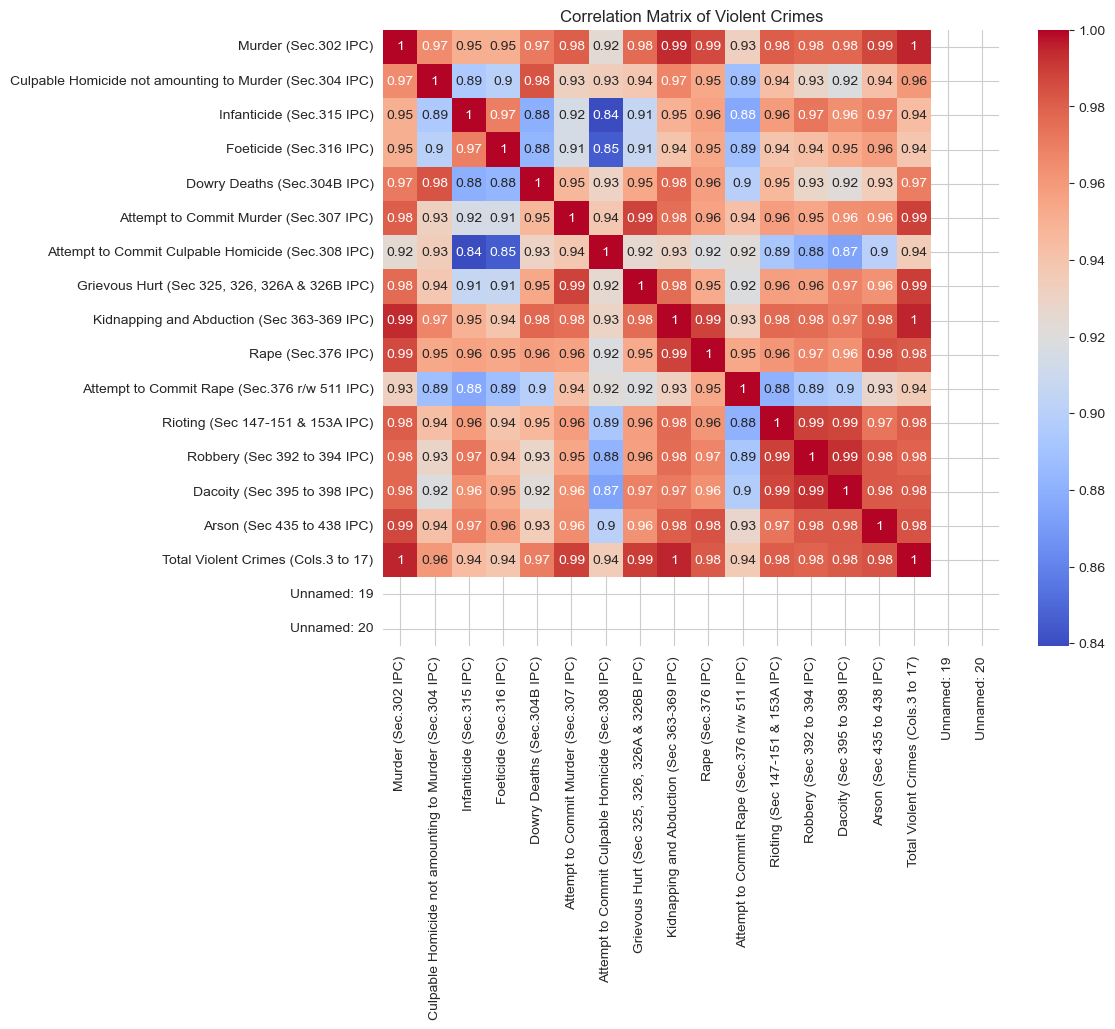

In [10]:
crime_data_numeric = crime_data.select_dtypes(include=[np.number])
corr_matrix = crime_data_numeric.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Violent Crimes')
plt.show()

# Question 4: Impact of Gender-Related Crimes
### Which states have the highest rates of gender-based crimes like rape, dowry deaths, and infanticide?

In [24]:
import pandas as pd

# Replace "crime_data.csv" with your actual file name
crime_data = pd.read_csv("NCRB_Table_1C.2 (1).csv")

gender_crimes = ['Rape(Sec. 376 IPC)', 'Dowry Deaths(Sec. 304B IPC)', 'Infanticide(Sec.315 IPC)']
gender_crime_rates = crime_data[gender_crimes].sum(axis=1).sort_values(ascending=False)

print('The top 5 states with the highest rates of gender-based crimes are:')
print(gender_crime_rates.head(5))

# Print all state names
print(crime_data["State/UT"].to_list())

KeyError: "None of [Index(['Rape(Sec. 376 IPC)', 'Dowry Deaths(Sec. 304B IPC)',\n       'Infanticide(Sec.315 IPC)'],\n      dtype='object')] are in the [columns]"

# Question 5: Crime Prevention Prioritization
### Based on crime frequency, which states should prioritize tackling specific crimes?

In [12]:
crime_frequencies = crime_data['Total Violent Crimes (Cols.3 to 17)'].value_counts().sort_values(ascending=False)

print('The top 5 states with the highest crime frequencies are:')
print(crime_frequencies.head(5))

The top 5 states with the highest crime frequencies are:
Total Violent Crimes (Cols.3 to 17)
7104.0     1
440.0      1
14314.0    1
49610.0    1
8848.0     1
Name: count, dtype: int64


# Question 6: Crime Severity and Category Analysis
### Which category of crimes contributes the most to total violent crime rates across different regions?

In [16]:
crime_categories = ['Murder (Sec.302 IPC)', 'Rape (Sec.376 IPC)', 'Dowry Deaths (Sec.304B IPC)', 'Kidnapping and Abduction (Sec 363-369 IPC)']
crime_category_rates = crime_data[crime_categories].sum().sort_values(ascending=False)

print('The top 5 crime categories that contribute the most to total violent crime rates are:')
print(crime_category_rates.head(5))

The top 5 crime categories that contribute the most to total violent crime rates are:
Kidnapping and Abduction (Sec 363-369 IPC)    208250.0
Rape (Sec.376 IPC)                             61416.0
Murder (Sec.302 IPC)                           56360.0
Dowry Deaths (Sec.304B IPC)                    12757.0
dtype: float64


In [21]:
import geopandas as gpd
import matplotlib.pyplot as plt

# 1. Get GeoDataFrame of Indian states
states = gpd.read_file('Indian_States.shp')

# 2. Merge crime data with GeoDataFrame
#  - Assuming you have a DataFrame called "crime_data"
#  - Make sure the state names in both dataframes match
states = states.merge(crime_data, on='state_name', how='left')

# 3. Plot the map
fig, ax = plt.subplots(1, 1)
states.plot(column='crime_rate', cmap='Reds', legend=True, ax=ax)
ax.set_title('Crime Intensity in India')

plt.show()

KeyError: 'state_name'